In [31]:
# Python 2.7 on Jupyter
# Libraries: Keras, pandas, numpy, matplotlib, seaborn

# For compatibility
from __future__ import absolute_import
from __future__ import print_function
# For manipulating data
import pandas as pd
import numpy as np
from keras.utils import np_utils # For y values
# For plotting
%matplotlib inline
import seaborn as sns
# For Keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation




In [32]:
# Set data
data = np.array([
    [0, 0, 0],
    [1, 1, 0],
    [2, 2, 0],
    [3, 3, 0],
    [4, 4, 0],
    [5, 5, 1],
    [6, 6, 1],
    [7, 7, 1],
    [8, 8, 1],
    [9, 9, 1],
])


In [35]:
data = np.vstack((data, data, data, data)) 

data = pd.DataFrame(data, columns=['x', 'y', 'class'])

print (data)


    x  y  class
0   0  0      0
1   1  1      0
2   2  2      0
3   3  3      0
4   4  4      0
5   5  5      1
6   6  6      1
7   7  7      1
8   8  8      1
9   9  9      1
10  0  0      0
11  1  1      0
12  2  2      0
13  3  3      0
14  4  4      0
15  5  5      1
16  6  6      1
17  7  7      1
18  8  8      1
19  9  9      1
20  0  0      0
21  1  1      0
22  2  2      0
23  3  3      0
24  4  4      0
25  5  5      1
26  6  6      1
27  7  7      1
28  8  8      1
29  9  9      1
30  0  0      0
31  1  1      0
32  2  2      0
33  3  3      0
34  4  4      0
35  5  5      1
36  6  6      1
37  7  7      1
38  8  8      1
39  9  9      1


In [37]:
# Split X and y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values
y


array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [7]:
# Get dimensions of input and output
dimof_input = X.shape[1]
dimof_output = len(set(y.flat))
print('dimof_input: ', dimof_input)
print('dimof_output: ', dimof_output)



dimof_input:  2
dimof_output:  2


In [38]:
# Set y categorical
y = np_utils.to_categorical(y, dimof_output)
y

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [49]:
from keras.layers.core import Dense, Activation
model = Sequential()
model.add(Dense(output_dim=dimof_output, input_dim=dimof_input))
model.add(Activation("relu"))
model.add(Dense(output_dim=dimof_output))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd')

model.summary()
model.layers

--------------------------------------------------------------------------------
Initial input shape: (None, 2)
--------------------------------------------------------------------------------
Layer (name)                  Output Shape                  Param #             
--------------------------------------------------------------------------------
Dense (dense)                 (None, 2)                     6                   
Activation (activation)       (None, 2)                     0                   
Dense (dense)                 (None, 2)                     6                   
Activation (activation)       (None, 2)                     0                   
--------------------------------------------------------------------------------
Total params: 12
--------------------------------------------------------------------------------


In [43]:
batch_size = 128
countof_epoch = 100
verbose = 0

In [47]:
# Train
model.fit(
    X, y,
    show_accuracy=True, validation_split=0.2,
    batch_size=batch_size, nb_epoch=countof_epoch, verbose=verbose)

# look at the weights
weights = model.get_weights()
weights

[array([[-0.5546661 ,  0.47703412],
        [-0.39654517, -0.76765555]], dtype=float32),
 array([ -5.03117190e-06,   6.33434057e-02], dtype=float32),
 array([[-0.27357867, -0.25747892],
        [ 1.00266552, -0.04952507]], dtype=float32),
 array([ 0.0237574, -0.0237574], dtype=float32)]

In [45]:
# Evaluate
loss, accuracy = model.evaluate(X, y, show_accuracy=True, verbose=verbose)
print('loss: ', loss)
print('accuracy: ', accuracy)
print()



loss:  0.451215088367
accuracy:  0.800000011921



In [42]:
# Predict
# model.predict_classes(X, verbose=verbose)
print('prediction of [1, 1]: ', model.predict_classes(np.array([[1, 1]]), verbose=verbose))
print('prediction of [8, 8]: ', model.predict_classes(np.array([[8, 8]]), verbose=verbose))



prediction of [1, 1]:  [0]
prediction of [8, 8]:  [1]


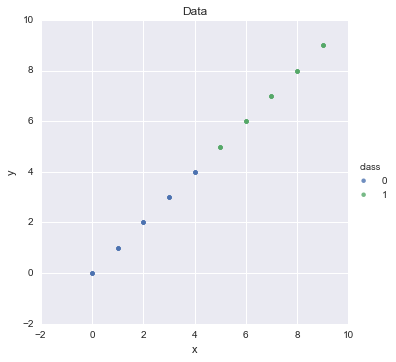

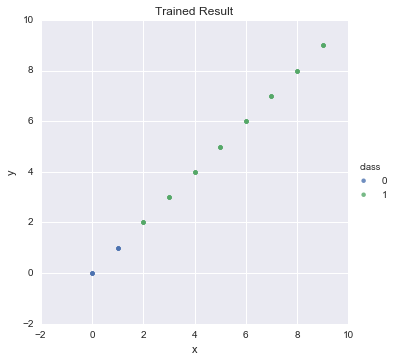

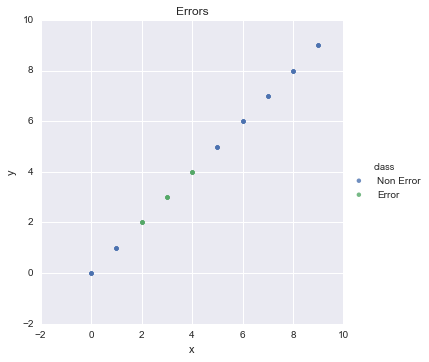

In [29]:
# Plot
sns.lmplot('x', 'y', data, 'class', fit_reg=False).set(title='Data')
data_ = data.copy()
data_['class'] = model.predict_classes(X, verbose=0)
sns.lmplot('x', 'y', data_, 'class', fit_reg=False).set(title='Trained Result')
data_['class'] = [ 'Error' if is_error else 'Non Error' for is_error in data['class'] != data_['class']]
sns.lmplot('x', 'y', data_, 'class', fit_reg=False).set(title='Errors')
None